For the Maven Healthcare Challenge, you'll be working as a Data Analyst for the American Hospital Association (AHA), a national organization that represents hospitals and their patients, and acts as a source of information on health care issues and trends.

As part of your role, you've been asked to analyze the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey results for the last 9 years. The intent of the HCAHPS initiative is to provide a standardized survey instrument for measuring patients’ perspectives on hospital care, and one of its 3 main goals is to "create incentives for hospitals to improve their quality of care".

Your task is to evaluate whether the HCAHPS survey has been successful in accomplishing this goal by answering questions like these:

Have hospitals' HCAHPS scores improved over the past 9 years?
Are there any specific areas where hospitals have made more progress than others?
Are there any major areas of opportunity remaining?
What recommendations can you make to hospitals to help them further improve the patient experience?


HCAHPS Patient Survey
National & state-level scores from 2013 to 2022 for the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey, a national, standardized survey of hospital patients about their experiences during a recent inpatient hospital stay.

https://mavenanalytics.io/challenges/maven-healthcare-challenge/26


https://www.qualtrics.com/experience-management/customer/net-promoter-score/

In [24]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [7]:
directory_path = 'data_tables/'

file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

dataframes = {os.path.basename(file).replace('.csv', ''): pd.read_csv(file) for file in file_paths}


In [18]:
national_results = dataframes['national_results']
print(national_results.info())
print(national_results['Measure ID'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Release Period         90 non-null     object
 1   Measure ID             90 non-null     object
 2   Bottom-box Percentage  90 non-null     int64 
 3   Middle-box Percentage  90 non-null     int64 
 4   Top-box Percentage     90 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.6+ KB
None
['H_CLEAN_HSP' 'H_COMP_1' 'H_COMP_2' 'H_COMP_3' 'H_COMP_5' 'H_COMP_6'
 'H_COMP_7' 'H_HSP_RATING' 'H_QUIET_HSP' 'H_RECMND']


In [26]:
national_results

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,2015-01-01,H_CLEAN_HSP,8,18,74
1,2015-01-01,H_COMP_1,4,17,79
2,2015-01-01,H_COMP_2,4,14,82
3,2015-01-01,H_COMP_3,9,23,68
4,2015-01-01,H_COMP_5,18,17,65
...,...,...,...,...,...
85,2023-01-01,H_COMP_6,14,0,86
86,2023-01-01,H_COMP_7,6,43,51
87,2023-01-01,H_HSP_RATING,9,21,70
88,2023-01-01,H_QUIET_HSP,10,28,62


In [22]:
#Convert release period to datetime

#df_rating = df[df['Measure ID'] == 'H_HSP_RATING']
#df_rating['Release Period'] = df_rating['Release Period'].str.lstrip('07_')
national_results['Release Period'] = pd.to_datetime(national_results['Release Period'].str.lstrip('07_'))
national_results.head()

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,2015-01-01,H_CLEAN_HSP,8,18,74
1,2015-01-01,H_COMP_1,4,17,79
2,2015-01-01,H_COMP_2,4,14,82
3,2015-01-01,H_COMP_3,9,23,68
4,2015-01-01,H_COMP_5,18,17,65


In [35]:
national_results_rating = national_results[national_results['Measure ID'] == 'H_HSP_RATING']
national_results_rec = national_results[national_results['Measure ID'] == 'H_RECMND']

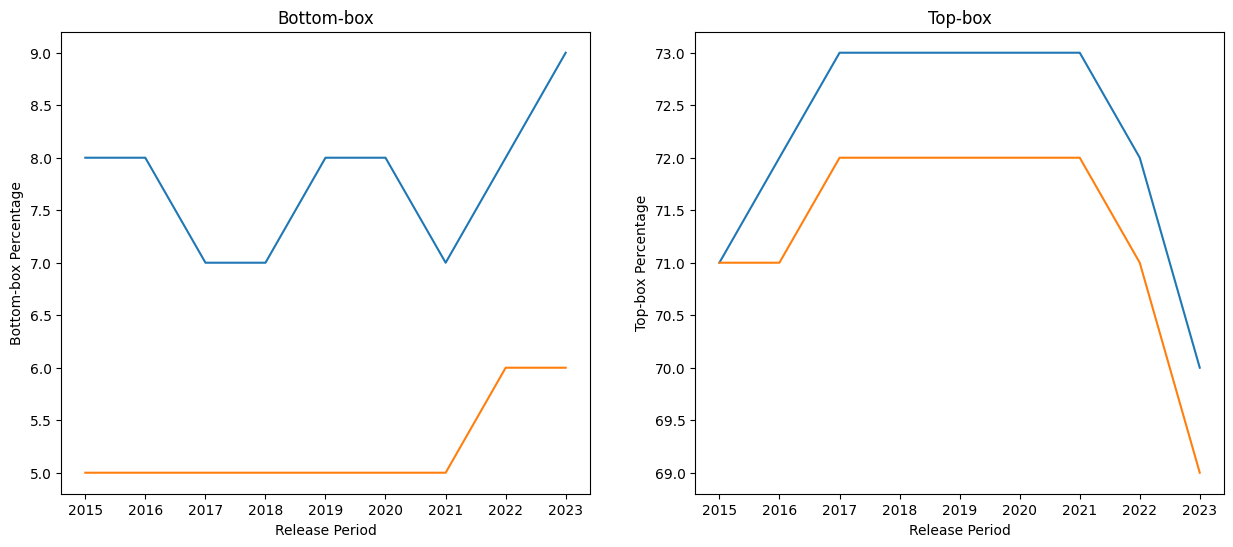

In [37]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(data=national_results_rating, x='Release Period', y='Bottom-box Percentage', ax=axes[0])
sns.lineplot(data=national_results_rec, x='Release Period', y='Bottom-box Percentage', ax=axes[0])

axes[0].set_title('Bottom-box')
sns.lineplot(data=national_results_rating, x='Release Period', y='Top-box Percentage', ax=axes[1])
sns.lineplot(data=national_results_rec, x='Release Period', y='Top-box Percentage', ax=axes[1])

axes[1].set_title('Top-box')
plt.show()

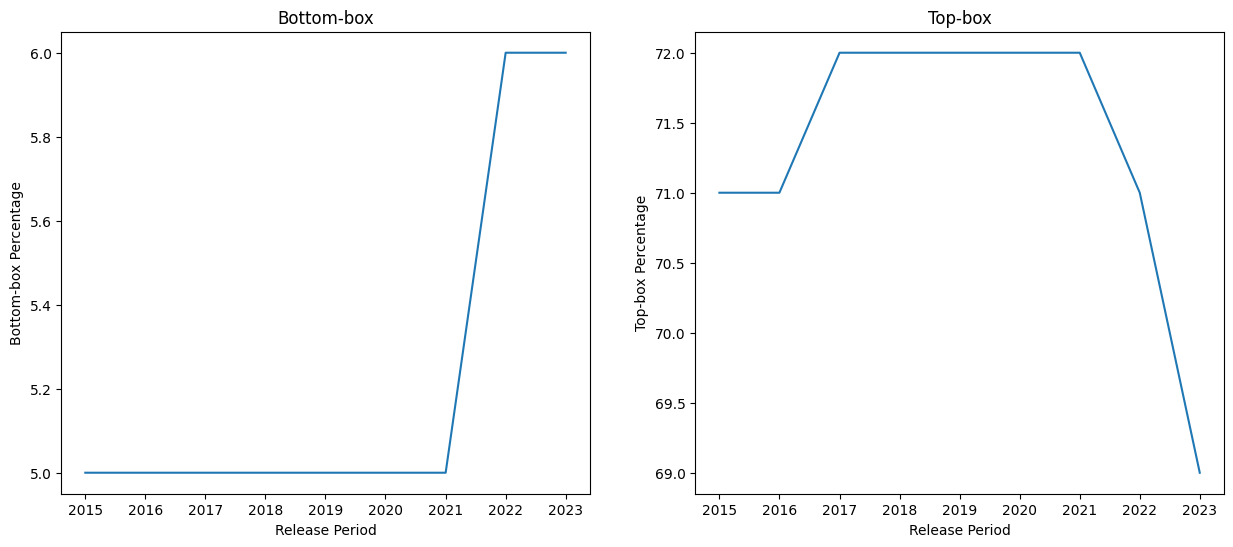

In [36]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(data=national_results_rec, x='Release Period', y='Bottom-box Percentage', ax=axes[0])
axes[0].set_title('Bottom-box')
sns.lineplot(data=national_results_rec, x='Release Period', y='Top-box Percentage', ax=axes[1])
axes[1].set_title('Top-box')
plt.show()

ValueError: Could not interpret value `Release Period` for parameter `x`

In [3]:
df.head()

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,07_2015,H_CLEAN_HSP,8,18,74
1,07_2015,H_COMP_1,4,17,79
2,07_2015,H_COMP_2,4,14,82
3,07_2015,H_COMP_3,9,23,68
4,07_2015,H_COMP_5,18,17,65


In [4]:
df['score'] = df['Top-box Percentage'] - df['Bottom-box Percentage']
df.head()

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,score
0,07_2015,H_CLEAN_HSP,8,18,74,66
1,07_2015,H_COMP_1,4,17,79,75
2,07_2015,H_COMP_2,4,14,82,78
3,07_2015,H_COMP_3,9,23,68,59
4,07_2015,H_COMP_5,18,17,65,47


In [13]:
df_rating = df[df['Measure ID'] == 'H_HSP_RATING']
df_rating['Release Period'] = df_rating['Release Period'].str.lstrip('07_')
df_rating['Release Period'] = pd.to_datetime(df_rating['Release Period'])
df_rating

C:\Users\Andy\AppData\Local\Temp\ipykernel_3196\2865532805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['Release Period'] = df_rating['Release Period'].str.lstrip('07_')
C:\Users\Andy\AppData\Local\Temp\ipykernel_3196\2865532805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['Release Period'] = pd.to_datetime(df_rating['Release Period'])


,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,score
7,2015-01-01,H_HSP_RATING,8,21,71,63
17,2016-01-01,H_HSP_RATING,8,20,72,64
27,2017-01-01,H_HSP_RATING,7,20,73,66
37,2018-01-01,H_HSP_RATING,7,20,73,66
47,2019-01-01,H_HSP_RATING,8,19,73,65
57,2020-01-01,H_HSP_RATING,8,19,73,65
67,2021-01-01,H_HSP_RATING,7,20,73,66
77,2022-01-01,H_HSP_RATING,8,20,72,64
87,2023-01-01,H_HSP_RATING,9,21,70,61


<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 7 to 87
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Release Period         9 non-null      datetime64[ns]
 1   Measure ID             9 non-null      object        
 2   Bottom-box Percentage  9 non-null      int64         
 3   Middle-box Percentage  9 non-null      int64         
 4   Top-box Percentage     9 non-null      int64         
 5   score                  9 non-null      int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 504.0+ bytes


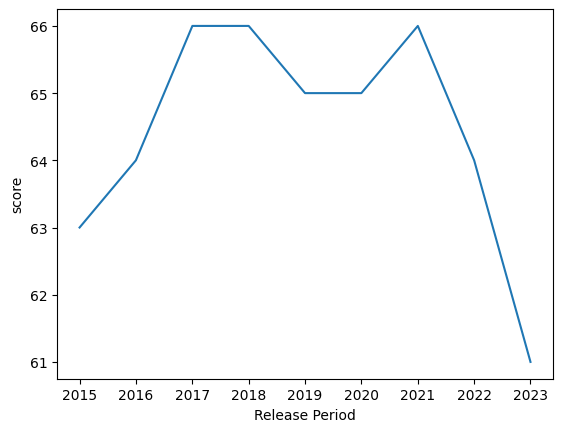

In [15]:
sns.lineplot(data=df_rating, x='Release Period', y='score')
plt.show()